<a href="https://colab.research.google.com/github/opeokupe/capstone-ai-ml/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Rate Analysis & Data Preprocessing
## Imperial College Capstone Project


In [9]:
# 1. Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
train_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test.csv'
train_data = pd.read_csv(train_url, on_bad_lines='skip')
test_data = pd.read_csv(test_url, on_bad_lines='skip' )

# 2. Initial Data Exploration
## 2.1 Basic Data Overview

In [11]:


def explore_data(df, title="Dataset"):
    """
    Performs initial exploration of the dataset
    """
    print(f"\n{title} Exploration:")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())



### Explore training data

In [12]:

explore_data(train_data, "Training Dataset")


Training Dataset Exploration:
--------------------------------------------------
Shape: (36992, 25)

First few rows:
                            customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  .


## 2.2 Data Distribution Analysis
Analyzes and plots distributions of numerical features

In [14]:


def analyze_distributions(df):
    """
    Analyzes and plots distributions of numerical features
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, len(numerical_cols)*4))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 2, i*2-1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(len(numerical_cols), 2, i*2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()



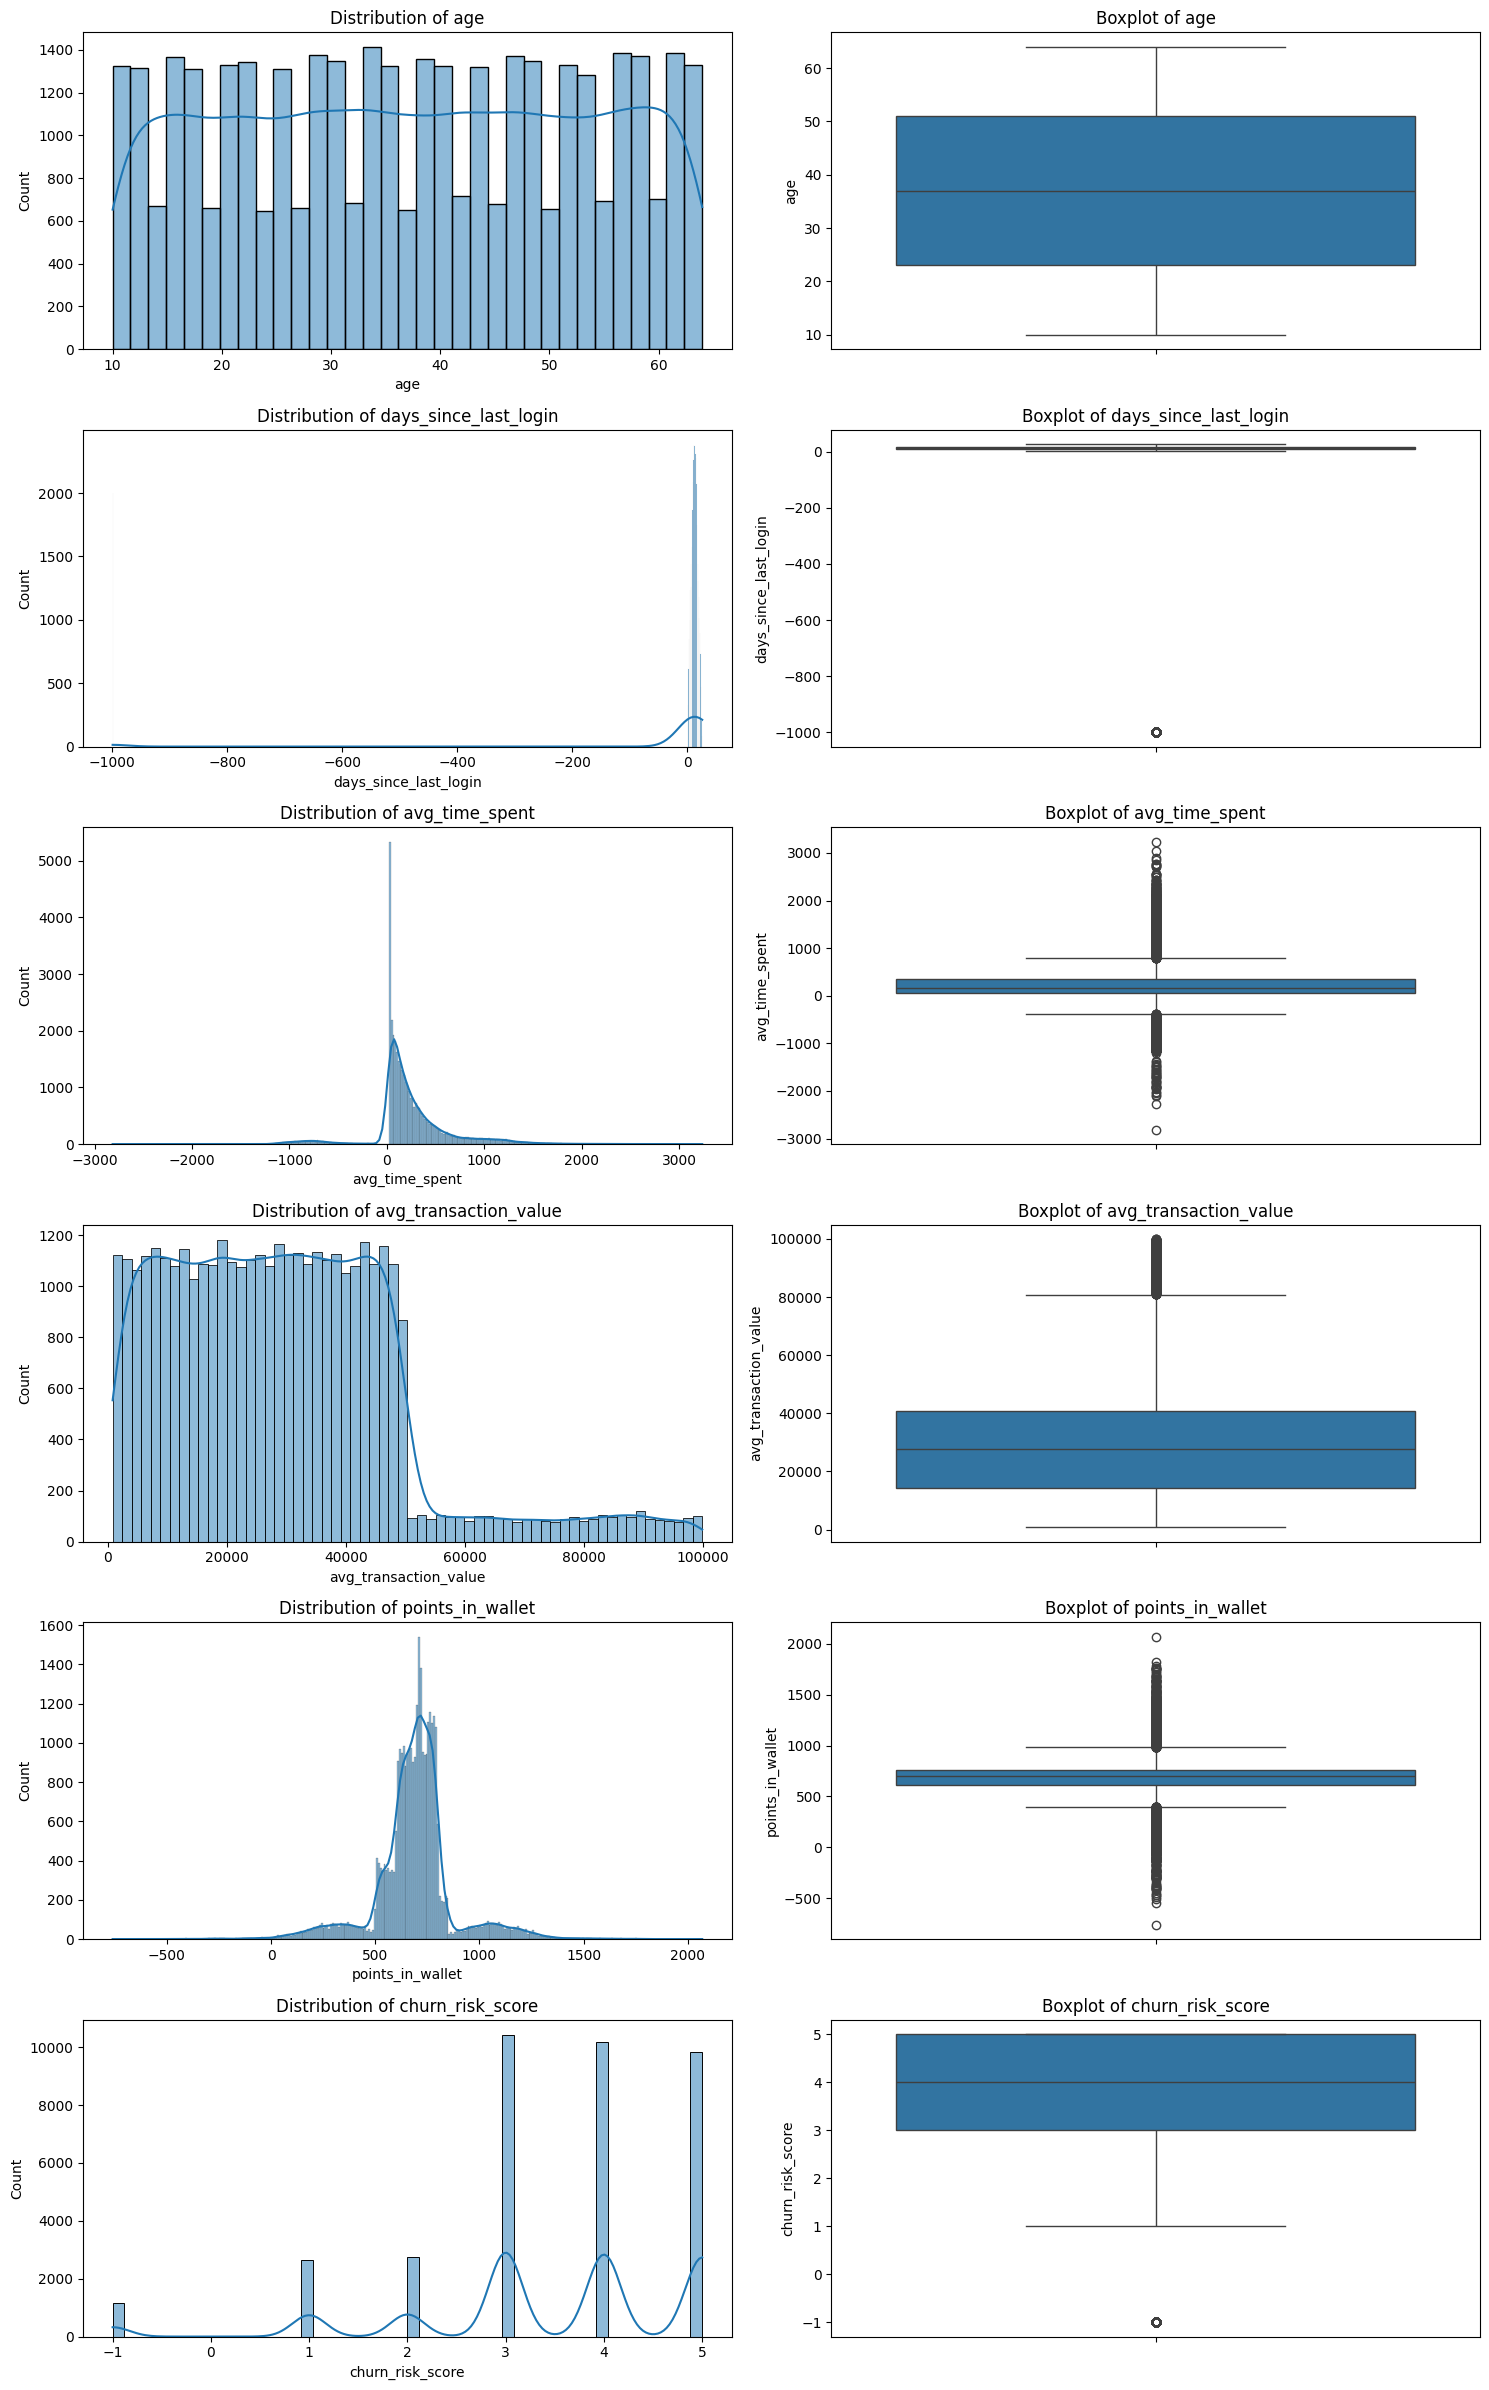

In [15]:

# Plot distributions
analyze_distributions(train_data)

# 3. Bias Analysis

Document potential biases in the dataset:
- Selection bias: [Your analysis here]
- Measurement bias: [Your analysis here]
- Demographic representation: [Your analysis here]
- Time-related biases: [Your analysis here]


# 4. Feature Engineering

In [16]:


def engineer_features(df):
    """
    Creates new features based on existing data
    Returns DataFrame with new features
    """
    df_processed = df.copy()

    # Example feature engineering (modify based on your specific needs):

    # 4.1 Time-based features
    if 'last_login' in df.columns:
        df_processed['days_since_login'] = (pd.to_datetime('now') - pd.to_datetime(df['last_login'])).dt.days

    # 4.2 Interaction features
    if 'visit_frequency' in df.columns and 'duration' in df.columns:
        df_processed['engagement_score'] = df['visit_frequency'] * df['duration']

    # 4.3 Categorical encoding
    # Add your categorical encoding logic here

    return df_processed

# Apply feature engineering
train_data_processed = engineer_features(train_data)
test_data_processed = engineer_features(test_data)



# 5. Data Preprocessing
* Handles missing values
* Scales numerical features
* Encodes categorical variables

In [18]:

def preprocess_data(df):
    """
    Applies all preprocessing steps:
    - Handles missing values
    - Scales numerical features
    - Encodes categorical variables
    Returns preprocessed DataFrame
    """
    df_processed = df.copy()

    # 5.1 Handle missing values
    # Add your missing value handling logic here

    # 5.2 Scale numerical features
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

    # 5.3 Additional preprocessing steps
    # Add any additional preprocessing steps here

    return df_processed

# Apply preprocessing
train_data_final = preprocess_data(train_data_processed)
test_data_final = preprocess_data(test_data_processed)



# 6. Save Processed Data
# Save the processed datasets

In [35]:

train_data_final.to_csv('processed_train.csv', index=False)
test_data_final.to_csv('processed_test.csv', index=False)



In [32]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


AttributeError: module 'os' has no attribute 'getls'

In [ ]:
# 7. Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(train_data_final.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

"""
Final Notes and Observations:

1. Data Quality:
   - [Document your findings about data quality]
   - [Note any concerning patterns or issues]

2. Feature Engineering Decisions:
   - [Document why you created each new feature]
   - [Explain the expected impact on the model]

3. Preprocessing Decisions:
   - [Explain your choice of scaling methods]
   - [Document handling of outliers]
   - [Explain treatment of missing values]

4. Next Steps:
   - [List any additional analyses needed]
   - [Note potential model considerations based on this analysis]
   """